In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram

In [67]:
ds=pd.read_csv('Mall_Customers.csv')

In [68]:
ds.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [69]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [70]:
ds.shape

(200, 5)

In [71]:
ds.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [72]:
ds.drop(['CustomerID'], inplace = True, axis = 1)

In [73]:
ds.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [74]:
gender = {"Male":0,'Female':1}
ds['Genre'] = ds['Genre'].map(gender)

In [75]:
ds.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [87]:
ds.rename(columns={'Annual Income (k$)': 'Annual_Income'}, inplace=True)
ds.rename(columns={'Spending Score (1-100)': 'Spending_Score'}, inplace=True)

In [88]:
ds.head()

,Genre,Age,Annual_Income,Spending_Score
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


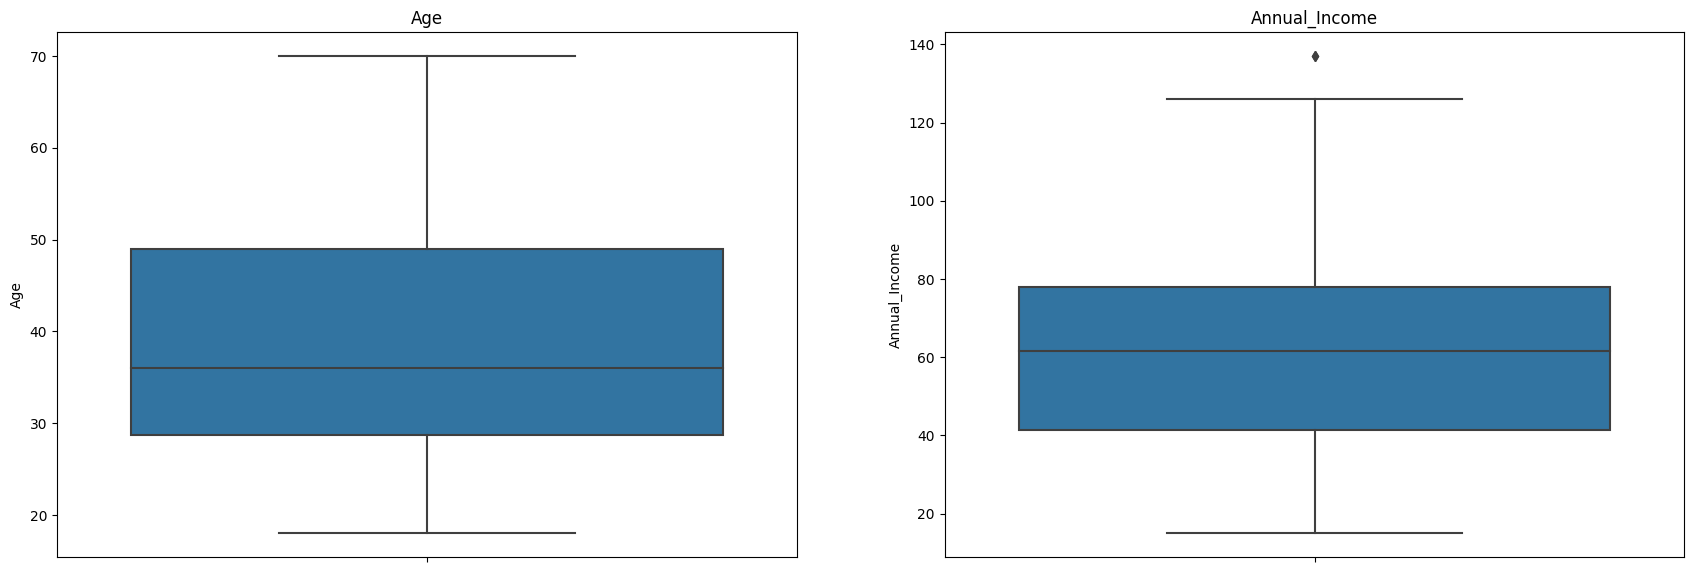

In [89]:
plt.figure(figsize=(21,15))

plt.subplot2grid((2,2), (0,0))
box1 = sns.boxplot(y=ds.Age)
plt.title("Age")

plt.subplot2grid((2,2), (0,1))
box2 = sns.boxplot(y=ds.Annual_Income)
plt.title("Annual_Income")


plt.show()

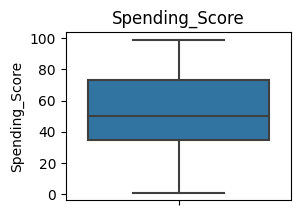

In [90]:
plt.subplot2grid((2,2), (0,1))
box2 = sns.boxplot(y=ds.Spending_Score)
plt.title("Spending_Score")

plt.show()

In [91]:
ds.Spending_Score.describe()

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: Spending_Score, dtype: float64

In [92]:
ds.Annual_Income.describe()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual_Income, dtype: float64

In [93]:
ds.Age.describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

In [151]:
ds.head()

,Genre,Age,Annual_Income,Spending_Score
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [203]:
col_names = ds.columns
features = ds[col_names]

scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled = pd.DataFrame(features, columns = col_names)
scaled.head()

,Genre,Age,Annual_Income,Spending_Score
0,-1.128152,-1.424569,-1.738999,-0.434801
1,-1.128152,-1.281035,-1.738999,1.195704
2,0.886405,-1.352802,-1.700830,-1.715913
3,0.886405,-1.137502,-1.700830,1.040418
4,0.886405,-0.563369,-1.662660,-0.395980


In [204]:
data=scaled[['Age','Annual_Income']]
data.head()

,Age,Annual_Income
0,-1.424569,-1.738999
1,-1.281035,-1.738999
2,-1.352802,-1.700830
3,-1.137502,-1.700830
4,-0.563369,-1.662660


In [205]:
import warnings 

warnings.filterwarnings('ignore')

In [206]:
wcss = {'wcss_score':[], 'no_of_clusters':[]}
for i in range(1,11):
    kmeans = KMeans(i, random_state=0)
    kmeans.fit(data)
    wcss['wcss_score'].append(kmeans.inertia_)
    wcss['no_of_clusters'].append(i)
wcss_ds = pd.DataFrame(wcss)

wcss_ds.head(10)

,wcss_score,no_of_clusters
0,400.000000,1
1,250.588116,2
2,132.855304,3
3,103.051518,4
4,81.408191,5
5,67.369005,6
6,54.247321,7
7,48.207642,8
8,41.804820,9
9,36.847185,10


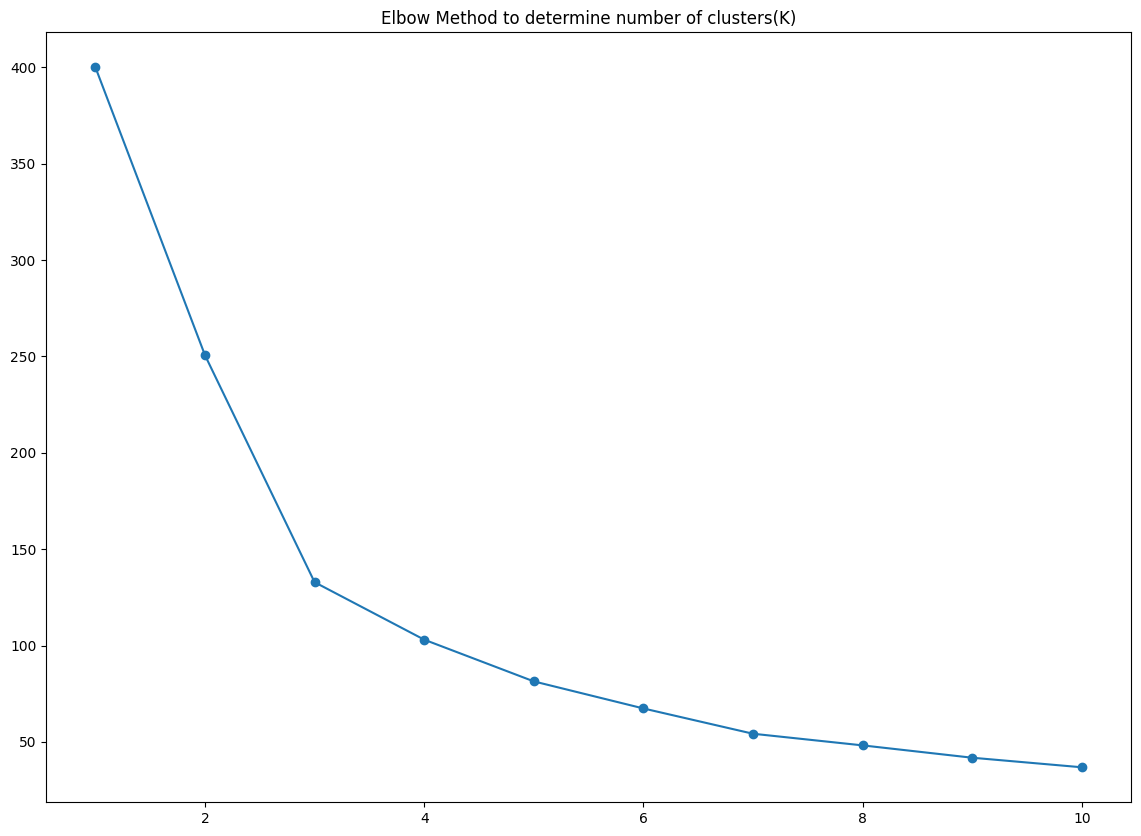

In [207]:
plt.figure(figsize=(14,10))
plt.plot(wcss_ds.no_of_clusters, wcss_ds.wcss_score, marker='o')
plt.title("Elbow Method to determine number of clusters(K)")
plt.show()

## K Means Clustering

In [211]:
#Algorithm

kmeans=KMeans(n_clusters=4,random_state=0) 
kmeans.fit(data)

KMeans(n_clusters=4, random_state=0)

In [212]:
prediction=kmeans.fit_predict(data)
prediction



array([3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3,
       1, 3, 1, 3, 1, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 3, 3, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 3, 3, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 3,
       1, 1, 3, 3, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2,
       2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [213]:
clustered_data = ds.copy()
clustered_data["cluster_index"] = prediction

In [214]:
clustered_data


,Genre,Age,Annual_Income,Spending_Score,cluster_index
0,0,19,15,39,3
1,0,21,15,81,3
2,1,20,16,6,3
3,1,23,16,77,3
4,1,31,17,40,3
...,...,...,...,...,...
195,1,35,120,79,0
196,1,45,126,28,0
197,0,32,126,74,0
198,0,32,137,18,0


<Axes: xlabel='Age', ylabel='Annual_Income'>

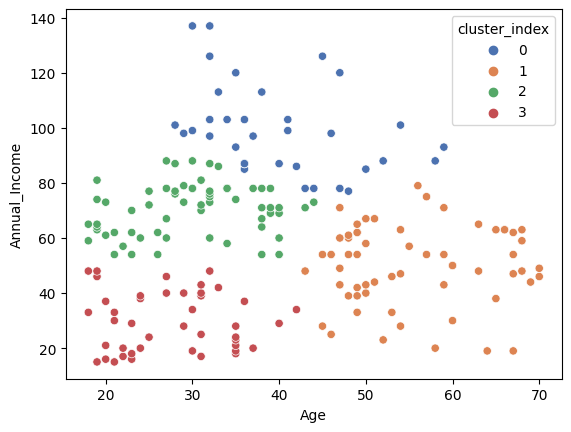

In [215]:
#lets visualise the clusters
sns.scatterplot(x=clustered_data.Age,
                y=clustered_data.Annual_Income,
                hue=clustered_data.cluster_index,
                palette="deep")

In [216]:
clustered_data.cluster_index.unique()

array([3, 1, 2, 0])

In [217]:
score = silhouette_score(ds, clustered_data.cluster_index, random_state=0)
print(f"Silhouette score: {score:0.3f} ~ 0")

Silhouette score: 0.246 ~ 0


## Agglomerative Clustering

In [225]:
agc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')

In [226]:
agg_predict_scaled = agc.fit_predict(scaled)
score = silhouette_score(scaled, agc.labels_, random_state=0)
print(score)

0.26322605188202447


In [227]:
agg_predict_data = agc.fit_predict(data)
score = silhouette_score(data, agc.labels_, random_state=0)
print(score)

0.3728063841272188


In [228]:
agg_cluster_scaled = ds.copy()
agg_cluster_scaled["cluster_index"] = agg_predict_scaled
agg_cluster_scaled.head()

,Genre,Age,Annual_Income,Spending_Score,cluster_index
0,0,19,15,39,1
1,0,21,15,81,1
2,1,20,16,6,0
3,1,23,16,77,1
4,1,31,17,40,0


In [229]:
agg_cluster_scaled.cluster_index.unique()

array([1, 0, 3, 2], dtype=int64)

In [230]:
agg_cluster_data = ds.copy()
agg_cluster_data["cluster_index"] = agg_predict_data
agg_cluster_data.head()

,Genre,Age,Annual_Income,Spending_Score,cluster_index
0,0,19,15,39,2
1,0,21,15,81,2
2,1,20,16,6,2
3,1,23,16,77,2
4,1,31,17,40,2


<Axes: xlabel='Age', ylabel='Annual_Income'>

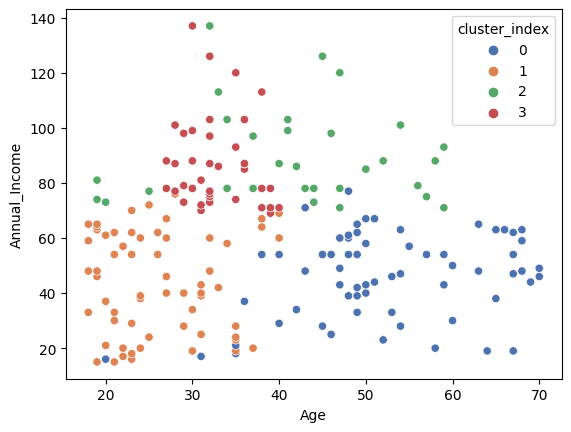

In [231]:
#lets visualise the clusters
sns.scatterplot(x=agg_cluster_scaled.Age,
                y=agg_cluster_scaled.Annual_Income,
                hue=agg_cluster_scaled.cluster_index,
                palette="deep")

<Axes: xlabel='Age', ylabel='Annual_Income'>

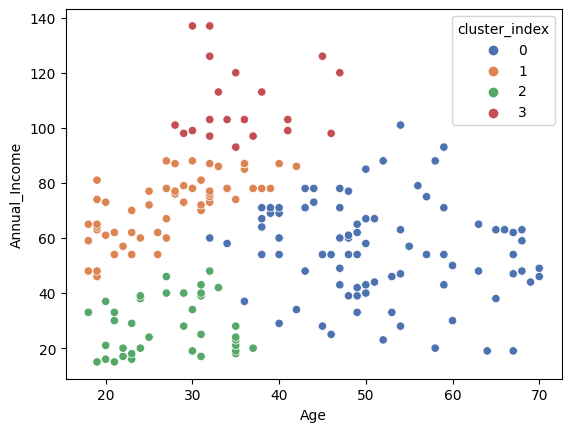

In [232]:
#lets visualise the clusters
sns.scatterplot(x=agg_cluster_data.Age,
                y=agg_cluster_data.Annual_Income,
                hue=agg_cluster_data.cluster_index,
                palette="deep")

In [233]:
agg_cluster_data.groupby('cluster_index').size()

cluster_index
0    86
1    57
2    37
3    20
dtype: int64